Question 3:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Question 4:

In [2]:
#Change to relative path with ../ 
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', nrows=6868)

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


Question 5:

In [5]:
gdp_df = (gdp_df
            .rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})
            .drop(columns=['Value Footnotes'])
        )   

Question 6:

In [6]:
print(gdp_df)
gdp_df.dtypes


          Country  Year  GDP_Per_Capita
0     Afghanistan  2019     2065.036398
1     Afghanistan  2018     2033.779002
2     Afghanistan  2017     2058.383832
3     Afghanistan  2016     2057.062164
4     Afghanistan  2015     2068.265904
...           ...   ...             ...
6863     Zimbabwe  1994     3263.934978
6864     Zimbabwe  1993     3033.504852
6865     Zimbabwe  1992     3054.889178
6866     Zimbabwe  1991     3426.598094
6867     Zimbabwe  1990     3324.348171

[6868 rows x 3 columns]


Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

 gdp_df - ROWS = 6868 , COLS = 3 

Column Data Types : Country = object aka. str , Year = int64 , GDP_Per_Capita = float64

Question 7: 

Years range from  1990 to 2019


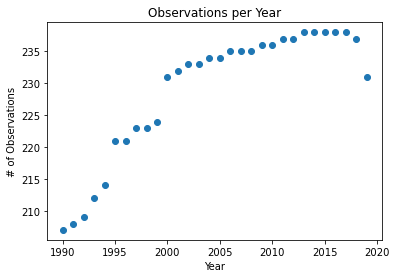

In [7]:
year_counts = gdp_df.value_counts(subset='Year')
x = year_counts.index
y = year_counts
plt.scatter(x,y)
plt.title('Observations per Year')
plt.xlabel('Year')
plt.ylabel('# of Observations')

print('Years range from ', x.min(), 'to', x.max())

There is an increase of observations taken per year from 1990 to 2019. There is also a slight decrease in observations in the last year, 2019.  

Question 8:

There are 238 countries represented in the dataset.
Countries with less than 30 years of data collected:
 ['Marshall Islands', 'Micronesia', 'Hungary', 'Turkmenistan', 'Slovak Republic', 'Aruba', 'Cambodia', 'Small states', 'Estonia', 'West Bank and Gaza', 'Bosnia and Herzegovina', 'Lithuania', 'Latvia', 'Serbia', 'Maldives', 'Croatia', 'Moldova', 'Kuwait', 'Montenegro', 'San Marino', 'Libya', 'Kosovo', 'Other small states', 'Liberia', 'Timor-Leste', 'CuraÃ§ao', 'Qatar', 'Palau', 'SÃ£o TomÃ© and Principe', 'Afghanistan', 'Nauru', 'Cayman Islands', 'Sint Maarten (Dutch part)', 'Turks and Caicos Islands', 'Djibouti']


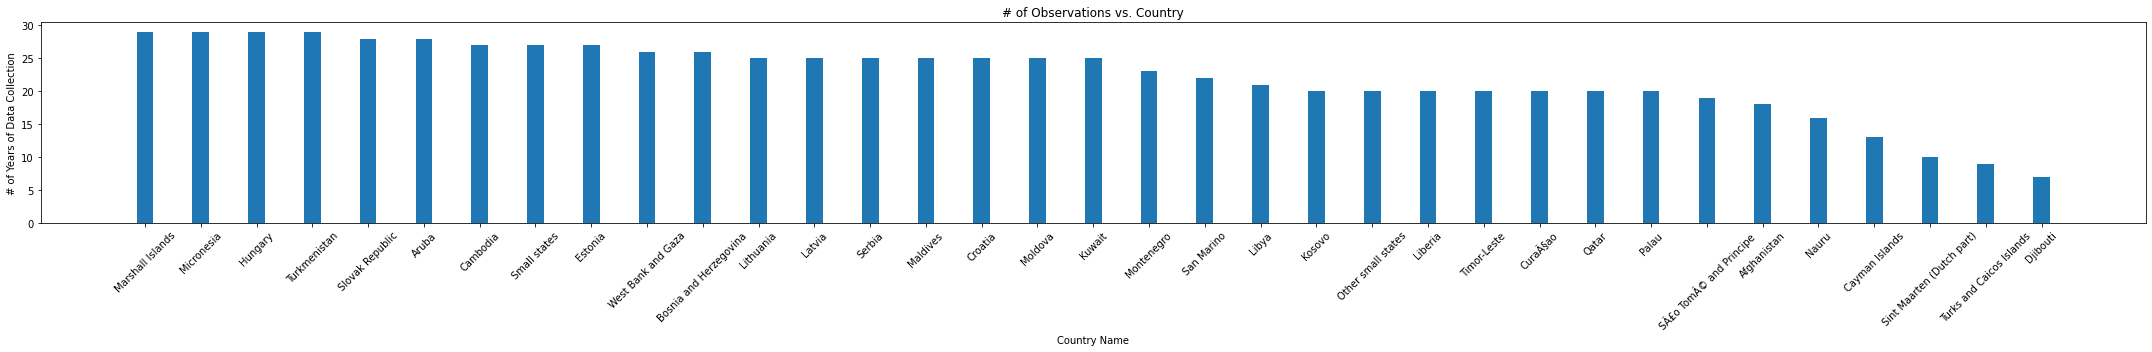

In [8]:
num_unique_countries = gdp_df.loc[:,'Country'].nunique()
print('There are',num_unique_countries, 'countries represented in the dataset.')

country_counts = gdp_df.loc[:,'Country'].value_counts()

#Countries that have less than 30 years of data 
underepresented = country_counts[country_counts < 30]
x_1 = underepresented.index
y_1 = underepresented

plt.rcParams["figure.figsize"] = [30, 5]
plt.rcParams["figure.autolayout"] = True

plt.bar(x_1, y_1, width=0.3)
plt.xticks(rotation=45)
plt.title('# of Observations vs. Country')
plt.xlabel('Country Name')
plt.ylabel('# of Years of Data Collection')

print("Countries with less than 30 years of data collected:\n",list(x_1))

I think these countries are in the category of developing countries, which means they have lower economic performance than fully developed countries. This could be a reason for their lack of GDP data collection. 

Question 9:

In [9]:
gdp_2014 = gdp_df[gdp_df['Year']==2014]

Question 10:

In [10]:
stats = gdp_2014['GDP_Per_Capita'].describe()
print(stats)

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64


Question 11:

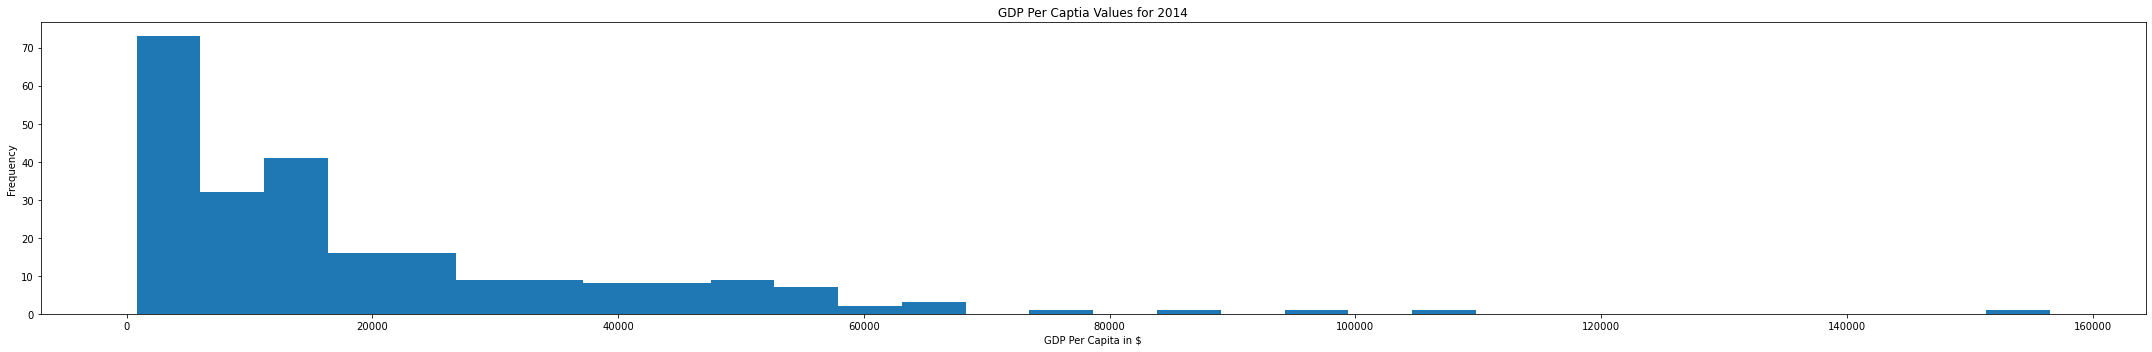

In [11]:
plt.hist(gdp_2014['GDP_Per_Capita'], bins=30)
plt.title('GDP Per Captia Values for 2014')
plt.xlabel('GDP Per Capita in $')
plt.ylabel('Frequency')
plt.show()

The shape of this ditribution is right skewed. 

Question 12:

In [12]:
#Top 5 countries 
top_5_values = (gdp_2014['GDP_Per_Capita'].sort_values(ascending=False)).iloc[:5]
top_5_countries_2014 = gdp_df.iloc[top_5_values.index]
print('Top 5 Countries 2014:',top_5_countries_2014)

#Bottom 5 countries
bottom_5_values = (gdp_2014['GDP_Per_Capita'].sort_values(ascending=True)).iloc[:5]
bottom_5_countries_2014 = gdp_df.iloc[bottom_5_values.index]
print('Bottom 5 Countries 2014:',bottom_5_countries_2014)

Top 5 Countries 2014:                Country  Year  GDP_Per_Capita
3721  Macao SAR, China  2014   156514.133850
3691        Luxembourg  2014   108760.916030
5138             Qatar  2014    95578.416973
5464         Singapore  2014    87808.663157
561            Bermuda  2014    77361.104881
Bottom 5 Countries 2014:                        Country  Year  GDP_Per_Capita
1047  Central African Republic  2014      822.610458
827                    Burundi  2014      886.235777
3781                    Malawi  2014     1027.208496
1422           Dem. Rep. Congo  2014     1029.790785
4528                     Niger  2014     1127.615541


Question 13:

In [13]:
gdp_pivoted = ((gdp_df.pivot(index='Country',columns='Year',values='GDP_Per_Capita'))[[1990, 2017]]).dropna()

Question 14:

In [14]:
gdp_pivoted['Percent Change'] = 100*(gdp_pivoted[2017] - gdp_pivoted[1990])/(gdp_pivoted[1990])

Question 15:

In [15]:
#Negative % change in gdp 
negative_per_change_gdp = gdp_pivoted[gdp_pivoted['Percent Change'] < 0]
print('There were', len(negative_per_change_gdp),'countries that experienced a negative percent change in GDP from 1990 to 2017')

There were 17 countries that experienced a negative percent change in GDP from 1990 to 2017


Question 16:

The country with the highest percent change in GDP was: Equatorial Guinea


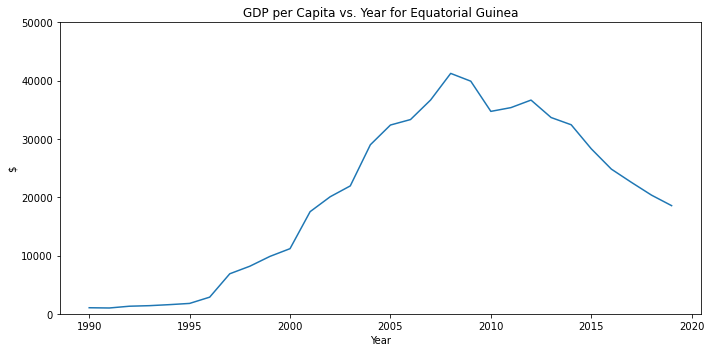

In [34]:
highest_change_in_GDP = gdp_pivoted['Percent Change'].idxmax()
print('The country with the highest percent change in GDP was:',highest_change_in_GDP)

# Line plot with GDP percapita for years 1990-2017
eq_gin_gdp_df = gdp_df[gdp_df['Country'] == highest_change_in_GDP]
x_3 = eq_gin_gdp_df['Year']
y_3 = eq_gin_gdp_df['GDP_Per_Capita']
plt.plot(x_3,y_3)
plt.title('GDP per Capita vs. Year for ' + highest_change_in_GDP)  
plt.xlabel('Year')
plt.ylabel('$')
plt.rcParams["figure.figsize"] = [10, 5]
plt.ylim(0,50000)
plt.show()

The country with the second highest percent change in GDP was: China


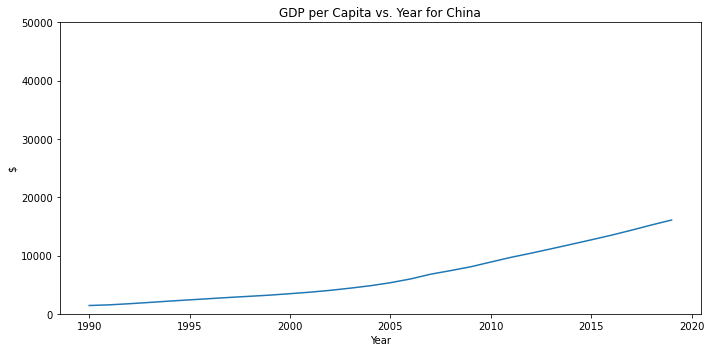

In [17]:
#Order the original dataframe, and knock off the top position and then return the index 
second_highest_change_in_GDP = gdp_pivoted['Percent Change'].sort_values(ascending=False)
second_highest_change_in_GDP = second_highest_change_in_GDP.iloc[1:].idxmax()
print('The country with the second highest percent change in GDP was:',second_highest_change_in_GDP)

# Line plot with GDP percapita for years 1990-2017
china_gdp_df = gdp_df[gdp_df['Country'] == second_highest_change_in_GDP]
x_4 = china_gdp_df['Year']
y_4 = china_gdp_df['GDP_Per_Capita']
plt.plot(x_4,y_4)
plt.title('GDP per Capita vs. Year for ' + second_highest_change_in_GDP)  
plt.xlabel('Year')
plt.ylabel('$')
plt.rcParams["figure.figsize"] = [10, 5]
plt.ylim(0,50000)
plt.show()


The trends for these countries vary drastically. Equitorial Guinea seemed to have a dramatic up and down fluctuation of their GDP per capita from 1990 to 2017, while China kept a shallow but steady increase over time. 

Question 17: 

In [18]:
continents = pd.read_csv('../data/continents.csv')

Question 18:

In [19]:
gdp_df = gdp_df.merge(continents)

Question 19:

Ther are a total of 6 continents in the dataframe.


Text(0.5, 1.0, 'Number of Countries per Continent')

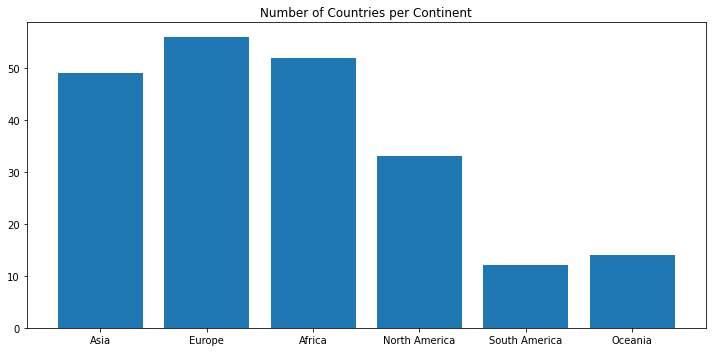

In [20]:
print('Ther are a total of', continents['Continent'].nunique(), 'continents in the dataframe.') #Print the number of unique continents in the df

num_countries_per_con = list([sum(continents['Continent'] == 'Asia')
                            , sum(continents['Continent'] == 'Africa')
                            , sum(continents['Continent'] == 'Europe')
                            , sum(continents['Continent'] == 'North America')
                            , sum(continents['Continent'] == 'South America')
                            , sum(continents['Continent'] == 'Oceania')]
                            )

plt.bar(continents['Continent'].unique(),num_countries_per_con)
plt.title('Number of Countries per Continent')


Question 20:

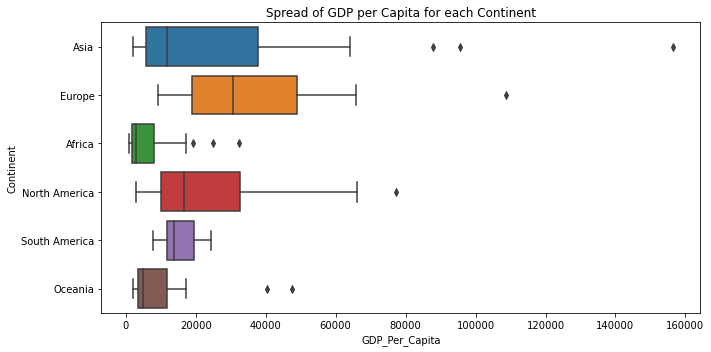

In [21]:
continents_gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

sns.boxplot(data=continents_gdp_2014, x='GDP_Per_Capita', y='Continent' )
plt.title('Spread of GDP per Capita for each Continent')
plt.show()

Question 21 & 22:

In [22]:
life_expectancy = pd.read_csv('../data/life_expectancy.csv')
life_expectancy = (life_expectancy
                    .drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
                    .melt(id_vars=['Country Name'])
                    .rename(columns={'Country Name':'Country','variable':'Year','value':'Life_Expectancy'})
                )

Question 23:

In [23]:
#First Country with lE > 80 yrs old, find the earliest year to hit 80
life_expectancy_over_80 = (
                            life_expectancy
                            [life_expectancy['Life_Expectancy'] > 80]
                            .sort_values(['Year'])
                            )
print('The first country with a life expectancy to exceed 80 was', life_expectancy_over_80['Country'].iloc[0],'.')

The first country with a life expectancy to exceed 80 was Japan .


Question 24:

In [24]:
#Making anew variable because I dont have one called gdp_per_capita up to this point
gdp_per_capita = pd.read_csv('../data/gdp_per_capita.csv', nrows=6868)
gdp_per_capita = (gdp_per_capita
                    .drop(columns=['Value Footnotes'])
                    .rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})
                )
#Merge the two DF's, must convert year on life expectany to int64 from str
#First Delete Rows with nan
life_expectancy = life_expectancy.dropna()
life_expectancy['Year'] = pd.to_numeric(life_expectancy['Year'])
gdp_le = gdp_per_capita.merge(life_expectancy)

In [25]:
gdp_le.head()

,Country,Year,GDP_Per_Capita,Life_Expectancy
0,Afghanistan,2019,2065.036398,64.833
1,Afghanistan,2018,2033.779002,64.486
2,Afghanistan,2017,2058.383832,64.130
3,Afghanistan,2016,2057.062164,63.763
4,Afghanistan,2015,2068.265904,63.377


In [26]:
gdp_le.tail()

,Country,Year,GDP_Per_Capita,Life_Expectancy
6109,Zimbabwe,1994,3263.934978,52.044
6110,Zimbabwe,1993,3033.504852,53.653
6111,Zimbabwe,1992,3054.889178,55.243
6112,Zimbabwe,1991,3426.598094,56.749
6113,Zimbabwe,1990,3324.348171,58.100


Question 25:

In [27]:
gdp_le_2019 = gdp_le[(gdp_le['Year'] == 2019)]

print(len(gdp_le_2019[gdp_le_2019['Life_Expectancy'] >= 80]), 'countries had a life expectancy of at least 80 years old in 2019.')            

38 countries had a life expectancy of at least 80 years old in 2019.


Question 26:

In [28]:
top_3_gdp_le_2019 = (gdp_le_2019
                    .sort_values(by=['GDP_Per_Capita'], ascending=False)
                    .iloc[:3]
                    )
top_3_countries = list(top_3_gdp_le_2019['Country'])

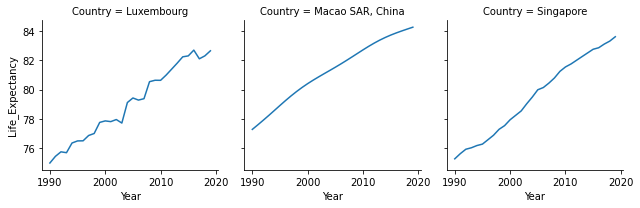

In [29]:
top_3_countries_df = gdp_le[gdp_le['Country'].isin(top_3_countries)] 

graph = sns.FacetGrid(top_3_countries_df, col='Country')
graph.map(plt.plot,'Year','Life_Expectancy')


Question 27:

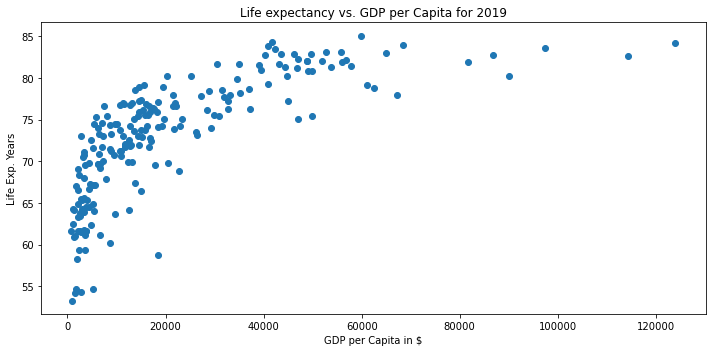

In [30]:
#Scatter of life expectancy vs. GDP for 2019
x_5 = gdp_le_2019['GDP_Per_Capita']
y_5 = gdp_le_2019['Life_Expectancy']

plt.scatter(x_5, y_5)
plt.title('Life expectancy vs. GDP per Capita for 2019')
plt.xlabel('GDP per Capita in $')
plt.ylabel('Life Exp. Years')
plt.show()

I notice that with an increase in GDP per capita of a country, there is a relative increase in the life expectancy of that country.  

Question 28:

In [31]:
correlation = gdp_le_2019['Life_Expectancy'].corr(gdp_le_2019['GDP_Per_Capita'])
print('The pearson correlation coefficient between life expectancy and GDP per capita for 2019 is:',correlation)

The pearson correlation coefficient between life expectancy and GDP per capita for 2019 is: 0.7228220227123533


This value shows that there is a moderately strong positive correlation between the two variables. 

Question 29:

In [32]:
logs = np.log(gdp_le_2019['GDP_Per_Capita'])
gdp_le_2019.insert(3,'Log_GDP_Per_Capita',logs)
correlation_2 = gdp_le_2019['Life_Expectancy'].corr(gdp_le_2019['Log_GDP_Per_Capita'])
print(correlation_2)

0.8573286661216394


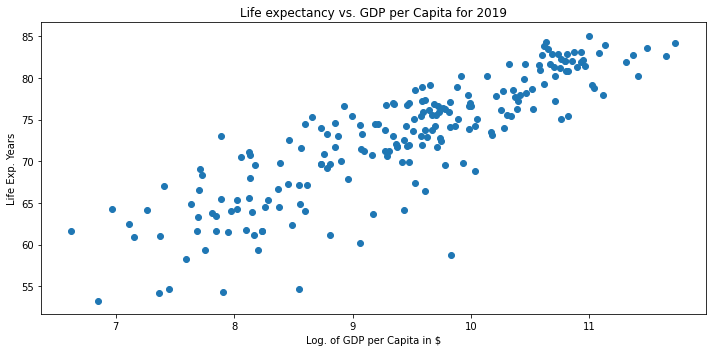

In [33]:
plt.scatter(gdp_le_2019['Log_GDP_Per_Capita'], gdp_le_2019['Life_Expectancy'])
plt.title('Life expectancy vs. GDP per Capita for 2019')
plt.xlabel('Log. of GDP per Capita in $')
plt.ylabel('Life Exp. Years')
plt.show()